<br><br>
<font size='6'><b>Regression</b></font><br><br>


# 1. Linear Regression

Begin by considering linear regression (easy to extend to more comlex predictions later on)

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\theta_{1}$ and $\theta_{2}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} $$

- $ \hat{y}_{i} $ : predicted output 

- $ \theta = 
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \theta) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ used


$$ \hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} \; \text{  such that  } \min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<table style='border-style: hidden; border-collapse: collapse;' width = 900> 
    <tr>
        <td width = 400 style='border-style: hidden; border-collapse: collapse;'>
            <img src='./image_files/linear_regression02.jpg' width = 300>
        </td>       
        <td width = 400>
            <img src='./image_files/linear_regression.png' width = 300>
        </td>
    </tr>
</table>

## 1.1. Re-cast problem as a least squares

- For convenience, we define a function that maps inputs to feature vectors, $\phi$

<br>
$$\begin{array}{Icr}\begin{align*} \hat{y}_{i}
& = \begin{bmatrix}x_{i} & 1\end{bmatrix}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\begin{bmatrix}x_{i} \\1\end{bmatrix}^{T}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\phi^{T}(x_{i})\theta
\end{align*}\end{array}
\begin{array}{Icr}
\quad \quad \text{feature vector}
\; \phi(x_{i}) = \begin{bmatrix}x_{i} \\1\end{bmatrix}
\end{array}$$

<br>

$$\Phi = \begin{bmatrix}x_{1} & 1 \\x_{2} & 1 \\ \vdots \\x_{m} & 1 \end{bmatrix}=\begin{bmatrix}\phi^T(x_{1}) \\\phi^T(x_{2}) \\\vdots \\\phi^T(x_{m}) \end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}_{1} \\\hat{y}_{2} \\\vdots \\\hat{y}_{m}\end{bmatrix}=\Phi\theta$$

<br>
- optimization problem
<br>

$$\min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2
=\min\limits_{\theta}\lVert\Phi\theta-y\rVert^2_2
\qquad \qquad  (\text{same as} \; \min_{x} \lVert Ax-b \rVert_2^2)$$

$$ \text{solution} \;
\theta^* = (\Phi^{T}\Phi)^{-1}\Phi^{T}y
$$

<font size='4'><b>Note</b></font>

$$\begin{array}{Icr} \text{input} \\ x_{i} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{feature} \\ \begin{bmatrix}x_{i} \\1 \end{bmatrix} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{predicted output} \\ \hat{y}_{i} \end{array}$$

<br>

$$\begin{array}{Icr}
\begin{bmatrix}x_{1} & 1 \\x_{2} & 1\\\vdots & \vdots\\x_{m} & 1\end{bmatrix}\begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{m}\end{bmatrix} \\
\begin{array}{Icr} \uparrow \\ \vec{a}_1 \end{array}
\;\;
\begin{array}{Icr} \uparrow \\ \vec{a}_2 \end{array}
\quad
\begin{array}{Icr} \uparrow \\ \vec{x} \end{array}
\quad\quad \;\;
\begin{array}{Icr} \uparrow \\ \vec{b} \end{array}
\end{array}
\quad
\begin{array}{Icr}
\quad \text{over-determined or} \\
\quad \text{projection}
\end{array}$$

<br>

$$A(= \Phi) = \left[ \vec{a}_1 \;\vec{a}_2 \right]$$

## 1.2. Single Variable Linear Regression

<font size='4'><b>1) use a linear algebra</b></font>
- known as _least square_

$$ \theta = (A^TA)^{-1}A^T y $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

m = y.shape[0]
#A = np.hstack([x, np.ones([m, 1])])
A = np.hstack([x, x**0])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

theta:
 [[ 0.67129519]
 [ 0.65306531]]


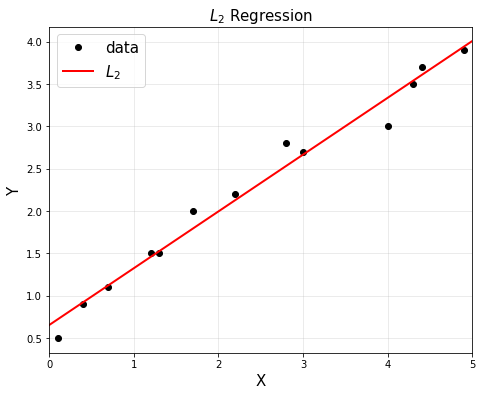

In [3]:
# to plot
plt.figure(figsize=(10, 6))
plt.title('$L_2$ Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0]*xp + theta[1,0]

plt.plot(xp, yp, 'r', linewidth=2, label="$L_2$")
plt.legend(fontsize=15)
plt.axis('scaled')
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

<font size='4'><b>2) use CVXPY optimization (least squared)</b></font>

<br><br>
$$  \min_{\theta} ~ \lVert \hat y - y \rVert_2  =  \min_{\theta} ~ \lVert A\theta - y \rVert_2  $$

In [4]:
import cvxpy as cvx

theta2 = cvx.Variable(2, 1)
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
cvx.Problem(obj,[]).solve()

print('theta:\n', theta2.value)

theta:
 [[ 0.67129519]
 [ 0.65306531]]


<font size='4'><b>By the way, do we have to use only $L_2$ norm? No.</b></font>
- Let's use $L_1$ norm

In [5]:
theta1 = cvx.Variable(2, 1)
obj = cvx.Minimize(cvx.norm(A*theta1-y, 1))
cvx.Problem(obj).solve()

print('theta:\n', theta1.value)

theta:
 [[ 0.68531634]
 [ 0.62587346]]


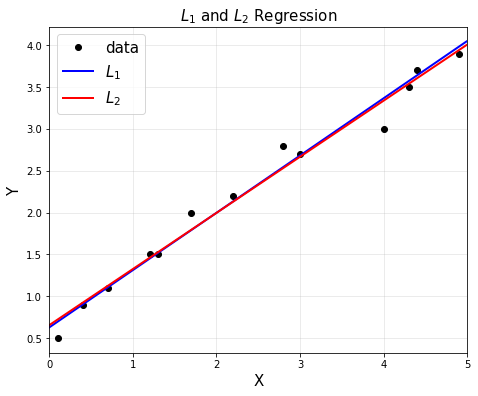

In [6]:
# to plot data
plt.figure(figsize=(10, 6))
plt.title('$L_1$ and $L_2$ Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label='data')

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp1 = theta1.value[0,0]*xp + theta1.value[1,0]
yp2 = theta2.value[0,0]*xp + theta2.value[1,0]

plt.plot(xp, yp1, 'b', linewidth=2, label='$L_1$')
plt.plot(xp, yp2, 'r', linewidth=2, label='$L_2$')
plt.legend(fontsize=15)
plt.axis('scaled')
plt.xlim([0, 5])
plt.grid(alpha=0.3)
plt.show()

$L_1$ norm also provides a decent linear approximation. __What if outliers exist?__

- fitting with the different norms
- Discuss the result
- it is important to understand what makes them different.


- source:
    - Week 9 of Computational Methods for Data Analysis by Coursera of Univ. of Washingon
    - Chapter 17, online book [available](http://courses.washington.edu/amath582/582.pdf)

In [7]:
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

# add outliers
x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1, 1)])
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1, 1)])

A = np.hstack([x, x**0])
A = np.asmatrix(A)

theta1 = cvx.Variable(2, 1)
obj1 = cvx.Minimize(cvx.norm(A*theta1-y, 1))
cvx.Problem(obj1).solve()

theta2 = cvx.Variable(2, 1)
obj2 = cvx.Minimize(cvx.norm(A*theta2-y, 2))
prob2 = cvx.Problem(obj2).solve()

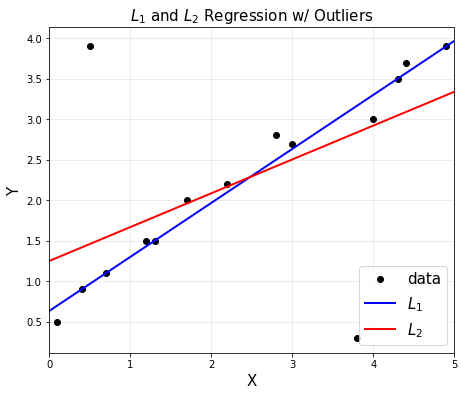

In [8]:
# to plot data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ko', label='data')
plt.title('$L_1$ and $L_2$ Regression w/ Outliers', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0]*xp + theta1.value[1,0]
yp2 = theta2.value[0,0]*xp + theta2.value[1,0]

plt.plot(xp, yp1, 'b', linewidth=2, label='$L_1$')
plt.plot(xp, yp2, 'r', linewidth=2, label='$L_2$')
plt.axis('scaled')
plt.xlim([0, 5])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

Think about what makes them different.

# 2. Multivariate Linear Regression (linear regression for multivariate data)

<br>

<table style='border-style: hidden; border-collapse: collapse;' width = '80%'> 
    <tr>
        <td width = 400 style='border-style: hidden; border-collapse: collapse;'>
            $$ \hat{y}_{i} = \theta_{1}x_1 + \theta_{2}x_2 + \theta_3$$

$$\phi(x_{i}) = \begin{bmatrix}x_{1i}\\x_{2i} \\1\end{bmatrix}$$
        </td>       
        <td width = 400>
            <img src='./image_files/multi_regression.png', width = 300>
        </td>
    </tr>
</table>

In [9]:
# for 3D plot
from mpl_toolkits.mplot3d import Axes3D

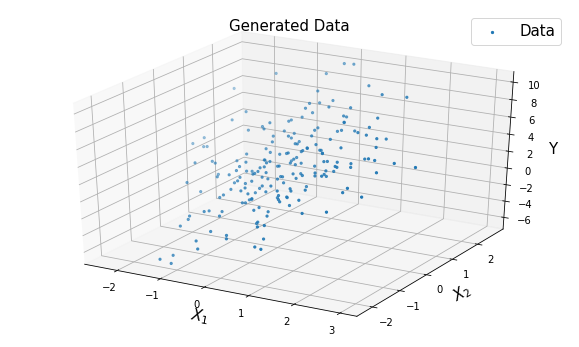

In [10]:
# y = theta1*x1 + theta2*x2 + theta3 + noise

n = 200
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
noise = 0.5*np.random.randn(n, 1);

y = 1*x1 + 3*x2 + 2 + noise

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title('Generated Data', fontsize=15)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('Y', fontsize=15)
ax.scatter(x1, x2, y, marker='.', label='Data')
#ax.view_init(30,30)
plt.legend(fontsize=15)
plt.show()

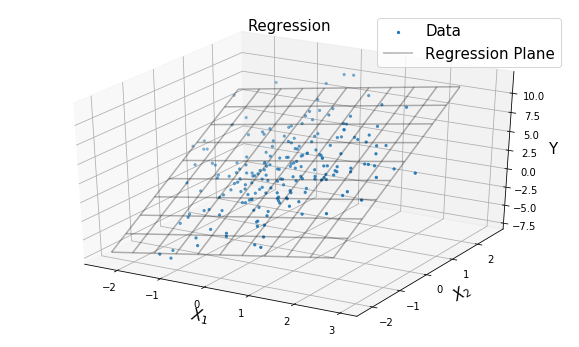

In [11]:
#% matplotlib qt5

A = np.hstack([x1, x2, np.ones((n, 1))])
A = np.asmatrix(A)
theta = (A.T*A).I*A.T*y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5), np.arange(np.min(x2), np.max(x2), 0.5))
YP = theta[0,0]*X1 + theta[1,0]*X2 + theta[2,0]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title('Regression', fontsize=15)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('Y', fontsize=15)
ax.scatter(x1, x2, y, marker='.', label='Data')
ax.plot_wireframe(X1, X2, YP, color='k', alpha=0.3, label='Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize=15)
plt.show()

# 3. Nonlinear Regression (Linear Regression for Non-linear Data)

<br>
<center><img src = './image_files/nonlinear2.png' width = 300 align="center"></center>

- same as linear regression, just with non-linear features


- method 1: constructing explicit feature vectors
    - polynomial features
    - Radial basis function (<font color='red'>RBF</font>) features


- method 2: implicit feature vectors, <font color='red'>kernels</font> (_optional_)


- polynomial (here, quad is used as an example)

$$
\begin{align*}
y &= \theta_1 + \theta_2 x + \theta_3 x^2 + \text{noise}
\end{align*}
$$


$$\phi(x_{i}) = A = \begin{bmatrix}1\\x_{i}\\x_{i}^2 \end{bmatrix}$$

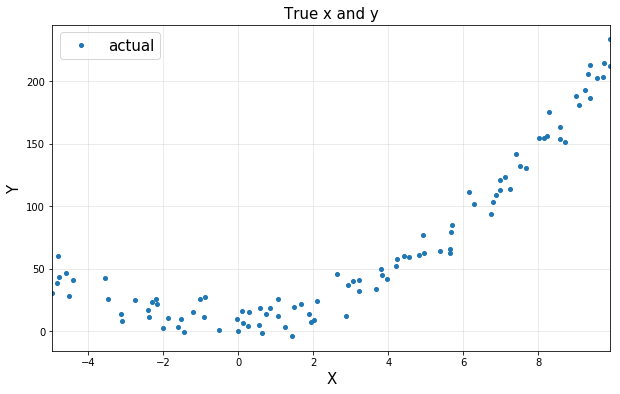

In [12]:
# y = theta1 + theta2*x + theta3*x^2 + noise

n = 100            
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise

plt.figure(figsize=(10, 6))
plt.title('True x and y', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'o', markersize=4, label='actual')
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

In [13]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print('theta:\n', theta)

theta:
 [[ 8.3668991 ]
 [ 1.76884509]
 [ 1.9533525 ]]


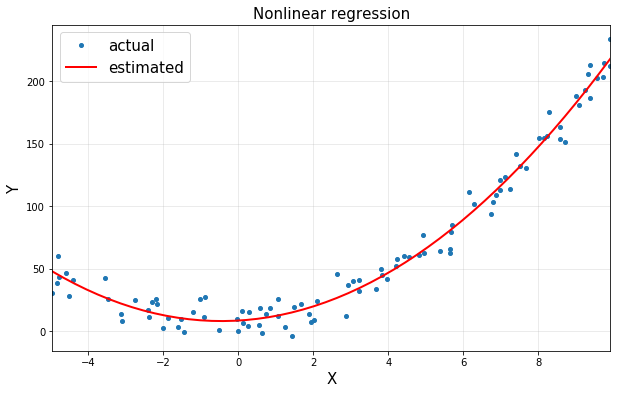

In [14]:
xp = np.linspace(np.min(x), np.max(x))
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=4, label='actual')
plt.plot(xp, yp, 'r', linewidth=2, label='estimated')

plt.title('Nonlinear regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

# 4. Overfitting

This is a very important code that you might want to fully understand or even memorize

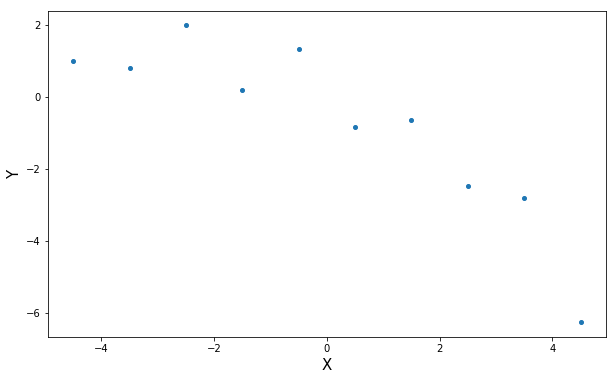

In [15]:
# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=4, label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

In [16]:
A = np.hstack([x**0, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])
#A = np.hstack([x**i for i in range(10)])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

[[  3.48274701e-01]
 [ -2.58951123e+00]
 [ -4.55286474e-01]
 [  1.85022226e+00]
 [  1.06250369e-01]
 [ -4.43328786e-01]
 [ -9.25753472e-03]
 [  3.63088178e-02]
 [  2.35143849e-04]
 [ -9.24099978e-04]]


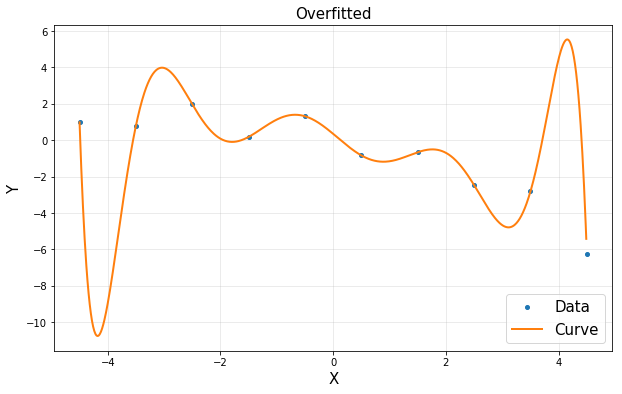

In [17]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 + theta[3,0]*xp**3 + \
     theta[4,0]*xp**4 + theta[5,0]*xp**5 + theta[6,0]*xp**6 + \
     theta[7,0]*xp**7 + theta[8,0]*xp**8 + theta[9,0]*xp**9

#polybasis = np.hstack([xp**i for i in range(10)])
#polybasis = np.asmatrix(polybasis)
#yp = polybasis*theta

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=4, label='Data')
plt.plot(xp[:,0], yp[:,0], linewidth=2, label='Curve')
plt.title('Overfitted', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

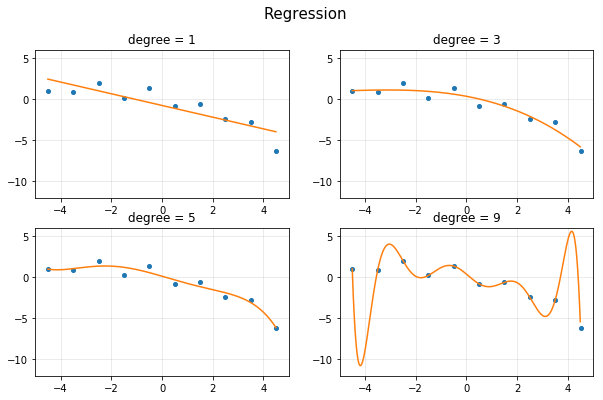

In [18]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = [1, 3, 5, 9]
RSS = []

plt.figure(figsize=(10, 6))
plt.suptitle('Regression', fontsize=15)

for k in range(4):
    A = np.hstack([x**i for i in range(d[k]+1)])
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    
    A = np.asmatrix(A)
    polybasis = np.asmatrix(polybasis)
    
    theta = (A.T*A).I*A.T*y
    yp = polybasis*theta
    
    RSS.append(np.linalg.norm(y - A*theta, 2))
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o', markersize=4)
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)
    
plt.show()

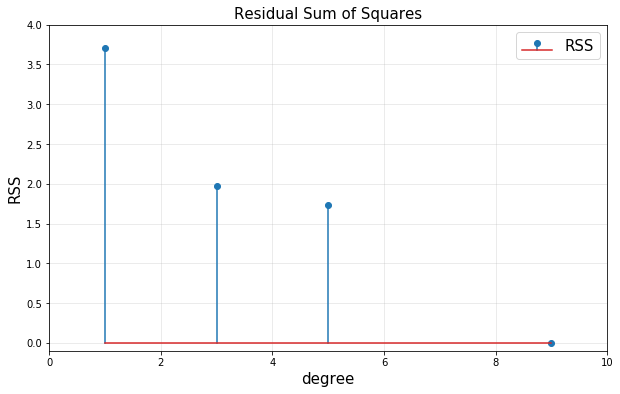

In [19]:
plt.figure(figsize=(10, 6))
plt.stem(d, RSS, label='RSS')
plt.title('Residual Sum of Squares', fontsize=15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('RSS', fontsize=15)
plt.axis([0, 10, -0.1, 4.0])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

# 5. Linear Basis Function Models

- Construct explicit feature vectors

- Consider linear combinations of fixed nonlinear functions of the input variables, of the form

$$ \hat{y}=\sum_{i=0}^d{\theta_i \phi_i(x)} = \Phi \theta$$

1) Polynomial functions

$$\phi_i(x) = x^i, \quad i = 0,\cdots,d$$

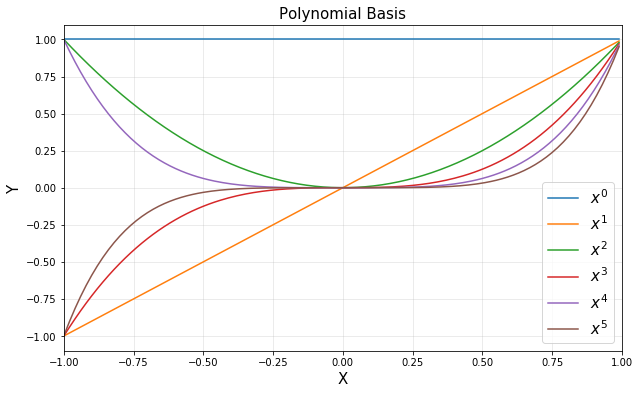

In [20]:
xp = np.arange(-1, 1, 0.01).reshape(-1, 1)
polybasis = np.hstack([xp**i for i in range(6)])

plt.figure(figsize=(10, 6))

for i in range(6):
    plt.plot(xp, polybasis[:,i], label='$x^{}$'.format(i))
    
plt.title('Polynomial Basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-1, 1, -1.1, 1.1])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

2) RBF functions with bandwidth $\sigma$ and $k$ RBF centers $\mu_i \in \mathbb{R}^n$

$$ \phi_i(x) =  \exp \left( - \frac{\lVert x-\mu_i \rVert^2}{2\sigma^2}\right) $$

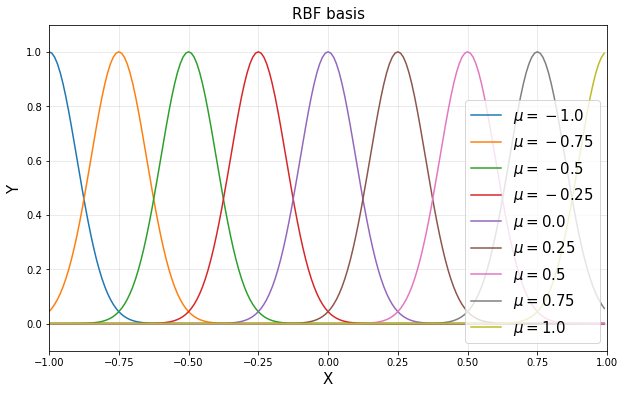

In [21]:
d = 9

u = np.linspace(-1, 1, d)
sigma = 0.1

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

plt.figure(figsize=(10, 6))

for i in range(d):
    plt.plot(xp, rbfbasis[:,i], label='$\mu = {}$'.format(u[i]))
    
plt.title('RBF basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-1, 1, -0.1, 1.1])
plt.legend(loc='lower right', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

- With many features, our prediction function becomes very expenssive

- Can lead to overfitting (low error on input data points, but high error nearby)

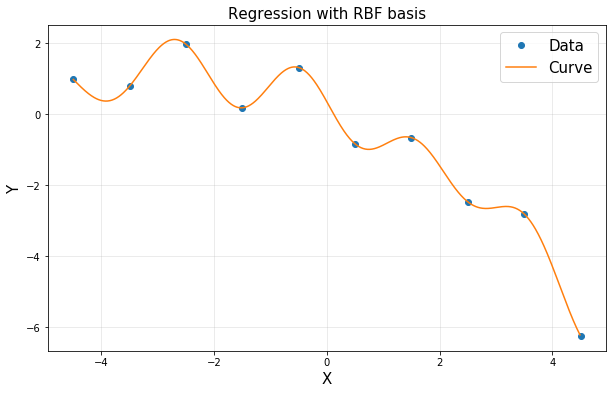

In [22]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

theta = (A.T*A).I*A.T*y
yp = rbfbasis*theta

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regression with RBF basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

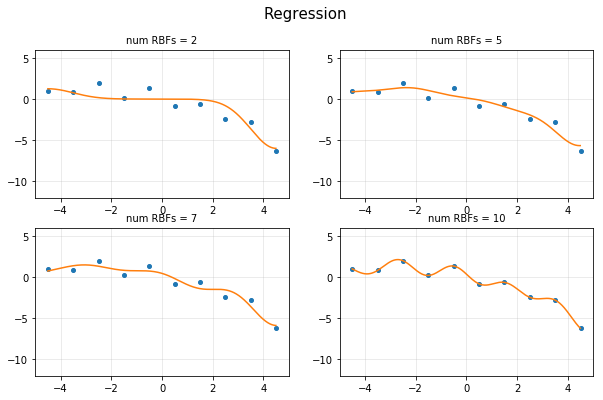

In [23]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = [2, 5, 7, 10]
sigma = 1

plt.figure(figsize=(10, 6))

for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o', markersize=4)
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('num RBFs = {}'.format(d[k]), fontsize=10)
    plt.grid(alpha=0.3)

plt.suptitle('Regression', fontsize=15)
plt.show()

# 6. Regularization (Shrinkage methods)

Often, overfitting associated with very large estimated parameters $\theta$

We want to balance

- how well function fits data

- magnitude of coefficients
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_2^2} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_2^2
\end{align*}
$$
<br>
  where $ RSS(\theta) = \lVert \Phi\theta - y \rVert^2_2 $, ( = Rresidual Sum of Squares) and $\lambda$ is a tuning parameter to be determined separately

<br>
- the second term, $\lambda \cdot \lVert \theta \rVert_2^2$, called a shrinkage penalty, is small when $\theta_1, \cdots,\theta_d$ are close to zeros, and so it has the effect of shrinking the estimates of $\theta_j$ towards zero


- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates


- known as a _ridge regression_

$$\min\; \lVert \Phi \theta - y \rVert_2^2$$

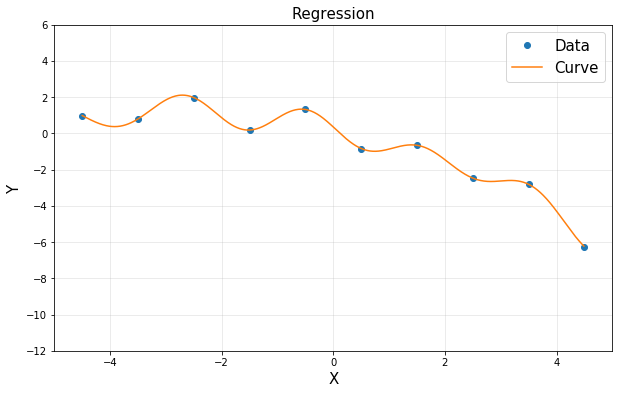

In [24]:
# CVXPY code

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.norm(A*theta-y, 2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

$$\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_2^2$$

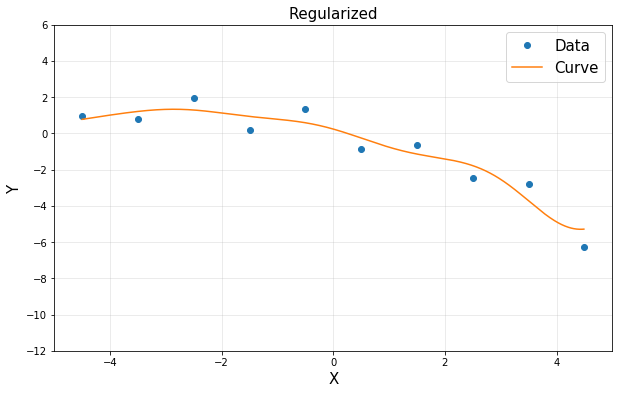

In [25]:
# ridge regression 

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

lamb = 0.1
theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regularized', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

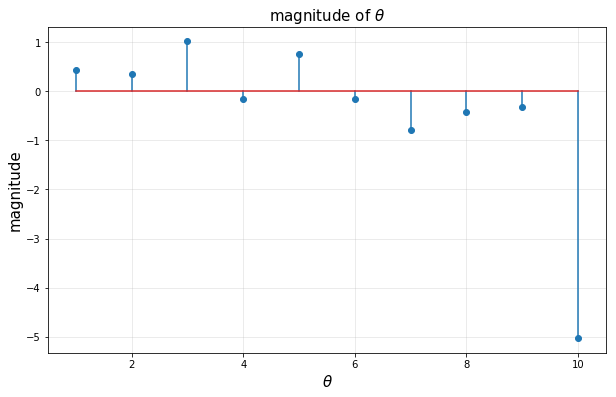

In [26]:
# Regulization ( = ridge nonlinear regression) encourages small weights, but not exactly 0
plt.figure(figsize=(10, 6))
plt.title(r'magnitude of $\theta$', fontsize=15)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('magnitude', fontsize=15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta.value)
plt.xlim([0.5, 10.5])
plt.grid(alpha=0.3)
plt.show()

# 7. Sparsity for feature selection using LASSO

- Least Squares with a penalty on the $L_1$-norm of the parameters


- start with full model (all possible features)


- 'Shrink' some coefficients exactly to 0
    - _i.e._, knock out certain features
    - the $\mathscr{l}_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero


- Non-zero coefficients indicate 'selected' features

Try this cost instead of ridge...
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_1} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_1
\end{align*}$$
<br>

- $\lambda$ is a tuning parameter = balance of fit and sparsity

<br>
- Another equivalent forms of optimizations


$$
\begin{array}{Icr}\begin{align*}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_1 \leq s
\end{align*}\end{array}
\quad\quad\quad\quad
\begin{array}{I}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_2^2 \leq s
\end{array}
$$


<br>
<center><img src='./image_files/lasso_picture.png' width="500" align="middle"></center>

$$\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_1$$

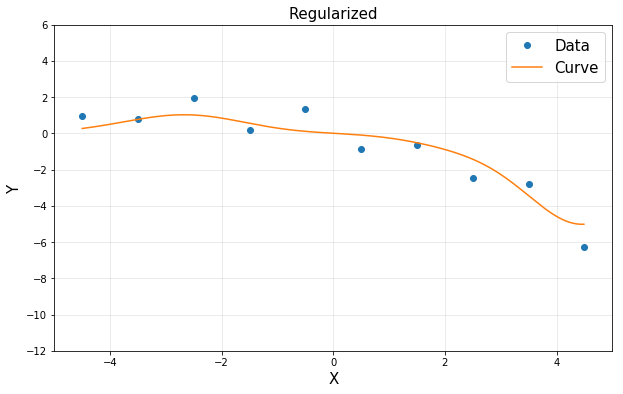

In [27]:
# LASSO regression 

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

lamb = 2
theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.title('Regularized', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

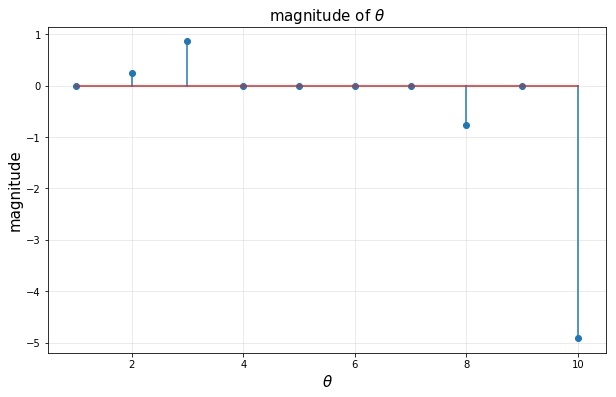

In [28]:
# Regulization ( = ridge nonlinear regression) encourages small weights, but not exactly 0
plt.figure(figsize=(10, 6))
plt.title(r'magnitude of $\theta$', fontsize=15)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('magnitude', fontsize=15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta.value)
plt.xlim([0.5, 10.5])
plt.grid(alpha=0.3)
plt.show()

In [29]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>